# Modeling

In this notebook we will go over different models that we can use to predict if a comment is or not **sarcastic**. Thus, we are talking about a classification problem.

On the one hand, we will face the problem without using a text-based machine learning model, meaning only using numeric values that we can extract from the comment.

On the other hand we will try different text-based methods such as NLTK (stemming, lemmatization), TF-IDF, Word2Vec and more.

## Let's set a Baseline!

Since the data was explored and cleaned in the previous notebook and we know that it **is balanced**, we can set our baseline to be an **accuracy of 50%**.

## Modeling without a text-based machine learning model

If we want to manage the data, we should import some important packages:

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import HashingVectorizer

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("train-balanced-sarcasm.csv")

In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
df["comment_length"] = df["comment"].apply(len)

Just for simplicity, we will only try to model with the following features:

In [5]:
df = df[["label", "score", "comment_length"]]

Then we assign the feature columns **X** and the target feature **y**:

In [6]:
X, y = df.loc[:, df.columns != "label"], df["label"]

Finally, we split our data into **train** and **validation** sets:

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

Let's check the shapes of the splits:

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((707541, 2), (303232, 2), (707541,), (303232,))

We are going to create a function to apply different models

In [95]:
def get_prediction(model, X_train, y_train, X_test, y_test):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    plt.xticks([0, 1], [0, 1])
    plt.yticks([0, 1], [0, 1])

    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.show()
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

#### Logistic Regression

We are going to apply a Logistic Regression model as it is, without changing any hyperparameter.

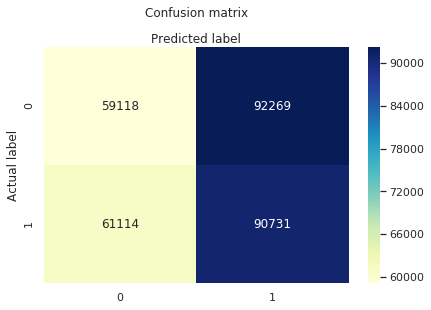

             precision    recall  f1-score   support

          0       0.49      0.39      0.44    151387
          1       0.50      0.60      0.54    151845

avg / total       0.49      0.49      0.49    303232

Accuracy: 0.4941727785985648


In [38]:
get_prediction(LogisticRegression(), X_train, y_train, X_test, y_test)

The result is not good, the accuracy is 49% and we did not even reach our 50% baseline that we set at the very beginning. Therefore, we are going to implement a **GridSearchCV** to choose which parameter combinations had the best scores for our model.

In [49]:
model = LogisticRegression(n_jobs=-1)
param_grid = {"C": [1.0, 0.5, 2.0], "max_iter": [100, 1000, 2000]}

In [41]:
grid = GridSearchCV(model, param_grid, scoring="accuracy",
                    cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1.0, max_iter=100 .............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=1.0, max_iter=100 .............................................
[CV] C=1.0, max_iter=100 .............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=1.0, max_iter=1000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=1.0, max_iter=1000 ............................................
[CV] .............................. C=1.0, max_iter=100, total=   0.8s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=1.0, max_iter=1000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=1.0, max_iter=2000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=1.0, max_iter=2000 ............................................
[CV] C=1.0, max_iter=2000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] ............................. C=1.0, max_iter=1000, total=   1.7s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=0.5, max_iter=100 .............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=0.5, max_iter=100 .............................................
[CV] ............................. C=1.0, max_iter=2000, total=   2.2s
[CV] C=0.5, max_iter=100 .............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] .............................. C=1.0, max_iter=100, total=   4.0s
[CV] C=0.5, max_iter=1000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] .............................. C=1.0, max_iter=100, total=   4.4s
[CV] C=0.5, max_iter=1000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=0.5, max_iter=1000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=0.5, max_iter=2000 ............................................
[CV] .............................. C=0.5, max_iter=100, total=   2.6s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] ............................. C=1.0, max_iter=1000, total=   5.1s
[CV] C=0.5, max_iter=2000 ............................................
[CV] ............................. C=1.0, max_iter=1000, total=   5.9s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=0.5, max_iter=2000 ............................................
[CV] ............................. C=0.5, max_iter=1000, total=   2.8s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=2.0, max_iter=100 .............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=2.0, max_iter=100 .............................................
[CV] ............................. C=1.0, max_iter=2000, total=   6.3s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=2.0, max_iter=100 .............................................
[CV] ............................. C=0.5, max_iter=2000, total=   3.0s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] ............................. C=1.0, max_iter=2000, total=   7.0s
[CV] C=2.0, max_iter=1000 ............................................


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] .............................. C=0.5, max_iter=100, total=   6.4s
[CV] C=2.0, max_iter=1000 ............................................
[CV] .............................. C=0.5, max_iter=100, total=   6.5s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=2.0, max_iter=1000 ............................................
[CV] .............................. C=2.0, max_iter=100, total=   2.7s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=2.0, max_iter=2000 ............................................
[CV] ............................. C=0.5, max_iter=1000, total=   6.3s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=2.0, max_iter=2000 ............................................
[CV] ............................. C=0.5, max_iter=1000, total=   6.7s


/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] C=2.0, max_iter=2000 ............................................
[CV] ............................. C=2.0, max_iter=1000, total=   2.5s


[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   13.3s remaining:    6.7s
/home/usuario/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV] ............................. C=0.5, max_iter=2000, total=   6.6s
[CV] .............................. C=2.0, max_iter=100, total=   5.5s
[CV] ............................. C=2.0, max_iter=2000, total=   2.9s
[CV] ............................. C=0.5, max_iter=2000, total=   7.3s
[CV] .............................. C=2.0, max_iter=100, total=   6.7s
[CV] ............................. C=2.0, max_iter=1000, total=   5.5s
[CV] ............................. C=2.0, max_iter=1000, total=   5.1s
[CV] ............................. C=2.0, max_iter=2000, total=   3.7s
[CV] ............................. C=2.0, max_iter=2000, total=   4.2s


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   17.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1.0, 0.5, 2.0], 'max_iter': [100, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.5013462117389663
{'C': 1.0, 'max_iter': 100}


It seems that the best hyperparameters are the ones in default. Let's try with a different model.

#### RandomForestClassifier

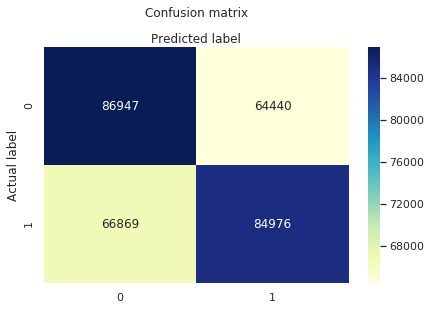

             precision    recall  f1-score   support

          0       0.57      0.57      0.57    151387
          1       0.57      0.56      0.56    151845

avg / total       0.57      0.57      0.57    303232

Accuracy: 0.5669685257492613


In [50]:
get_prediction(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Using the RandomForestClassifier without tunning its hyperparameters we can get a greater accuracy than the baseline.

Let's see if we can improve it a little bit:

In [51]:
model = RandomForestClassifier(n_jobs=-1)
param_grid = {"n_estimators": [10, 100, 150, 200], "max_depth": [3, 6, 9, 12, 15]}

In [52]:
grid = GridSearchCV(model, param_grid, scoring="accuracy",
                    cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] max_depth=3, n_estimators=10 ....................................
[CV] max_depth=3, n_estimators=10 ....................................
[CV] max_depth=3, n_estimators=100 ...................................
[CV] max_depth=3, n_estimators=100 ...................................
[CV] max_depth=3, n_estimators=100 ...................................
[CV] max_depth=3, n_estimators=150 ...................................
[CV] max_depth=3, n_estimators=150 ...................................
[CV] max_depth=3, n_estimators=150 ...................................
[CV] max_depth=3, n_estimators=200 ...................................
[CV] max_depth=3, n_estimators=200 ...................................
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ..................... max_depth=3, n_estimators=10, total=   1.3s
[CV] max_depth=6

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min


[CV] .................... max_depth=6, n_estimators=100, total= 1.2min
[CV] max_depth=9, n_estimators=100 ...................................
[CV] ..................... max_depth=9, n_estimators=10, total=  12.2s
[CV] max_depth=9, n_estimators=150 ...................................
[CV] ..................... max_depth=9, n_estimators=10, total=  12.4s
[CV] max_depth=9, n_estimators=150 ...................................
[CV] ..................... max_depth=9, n_estimators=10, total=  12.5s
[CV] max_depth=9, n_estimators=150 ...................................
[CV] .................... max_depth=6, n_estimators=150, total= 1.6min
[CV] max_depth=9, n_estimators=200 ...................................
[CV] .................... max_depth=6, n_estimators=150, total= 1.6min
[CV] max_depth=9, n_estimators=200 ...................................
[CV] .................... max_depth=6, n_estimators=150, total= 1.6min
[CV] max_depth=9, n_estimators=200 ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 150, 200], 'max_depth': [3, 6, 9, 12, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [53]:
print(grid.best_score_)
print(grid.best_params_)

0.573698202648327
{'max_depth': 6, 'n_estimators': 200}


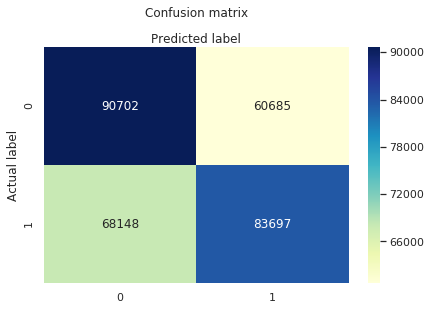

             precision    recall  f1-score   support

          0       0.57      0.60      0.58    151387
          1       0.58      0.55      0.57    151845

avg / total       0.58      0.58      0.57    303232

Accuracy: 0.5751338908822288


In [54]:
get_prediction(RandomForestClassifier(max_depth=6, n_estimators=200, n_jobs=-1), X_train, y_train, X_test, y_test)

The accuracy improved by 1% after tunning the hyperparameters.

#### LinearSVC

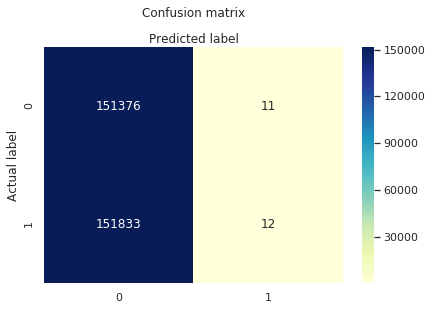

             precision    recall  f1-score   support

          0       0.50      1.00      0.67    151387
          1       0.52      0.00      0.00    151845

avg / total       0.51      0.50      0.33    303232

Accuracy: 0.49924810046433094


In [58]:
get_prediction(LinearSVC(), X_train, y_train, X_test, y_test)

### Conclusion

We think that ignoring the comments feature it is not a good idea because the different models can not achieve a good result.

## Modeling with a text-based machine learning model

In [2]:
df = pd.read_csv("train-balanced-sarcasm.csv")

In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
df = df[["comment", "label"]].copy()

In [5]:
X, y = df["comment"], df["label"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [7]:
def get_scores(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    plt.xticks([0, 1], [0, 1])
    plt.yticks([0, 1], [0, 1])

    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.show()
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

#### TF-IDF

In [16]:
pipeline = Pipeline(steps=
                   [("tfidf", TfidfVectorizer()),
                   ("clf", LogisticRegression())])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

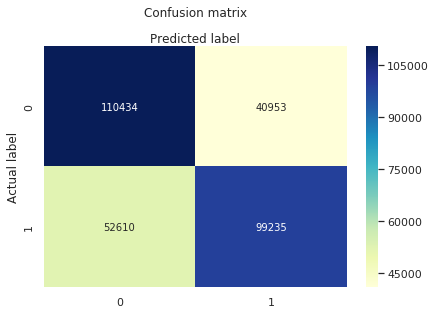

             precision    recall  f1-score   support

          0       0.68      0.73      0.70    151387
          1       0.71      0.65      0.68    151845

avg / total       0.69      0.69      0.69    303232

Accuracy: 0.6914474725622626


In [9]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

In [22]:
pipeline = Pipeline(steps=
                   [("tfidf", TfidfVectorizer()),
                   ("clf", RandomForestClassifier(max_depth=10, n_estimators=200))])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

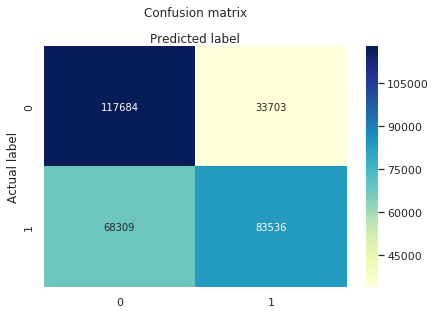

             precision    recall  f1-score   support

          0       0.63      0.78      0.70    151387
          1       0.71      0.55      0.62    151845

avg / total       0.67      0.66      0.66    303232

Accuracy: 0.6635843182777543


In [23]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

#### HashingVectorizer

In [32]:
pipeline = Pipeline(steps=
                   [("dim_red", HashingVectorizer()),
                    ("model", LinearSVC())])

_ = pipeline.fit(X_train, y_train)

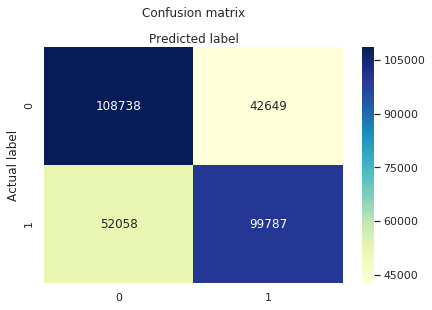

             precision    recall  f1-score   support

          0       0.68      0.72      0.70    151387
          1       0.70      0.66      0.68    151845

avg / total       0.69      0.69      0.69    303232

Accuracy: 0.6876747836639933


In [33]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

In [34]:
pipeline = Pipeline(steps=
                   [("dim_red", HashingVectorizer()),
                    ("model", LogisticRegression())])

_ = pipeline.fit(X_train, y_train)

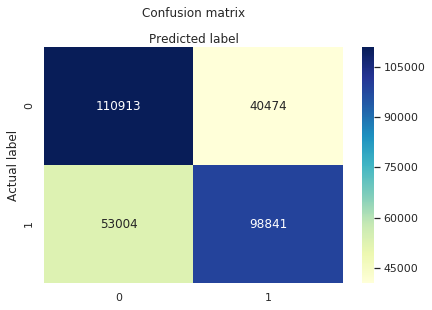

             precision    recall  f1-score   support

          0       0.68      0.73      0.70    151387
          1       0.71      0.65      0.68    151845

avg / total       0.69      0.69      0.69    303232

Accuracy: 0.691727785985648


In [35]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

In [36]:
pipeline = Pipeline(steps=
                   [("dim_red", HashingVectorizer()),
                    ("model", RandomForestClassifier(max_depth=10, n_estimators=200))])

_ = pipeline.fit(X_train, y_train)

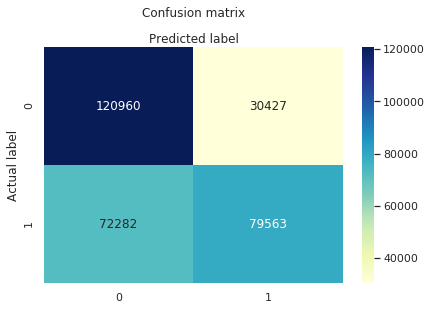

             precision    recall  f1-score   support

          0       0.63      0.80      0.70    151387
          1       0.72      0.52      0.61    151845

avg / total       0.67      0.66      0.65    303232

Accuracy: 0.6612857482059941


In [37]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

### Stemming

In [39]:
ps = PorterStemmer()

In [43]:
def sentence_tokenizer_stemmer(text):
    return " ".join([ps.stem(word) for word in word_tokenize(text)])

In [44]:
df["stem_comment"] = df["comment"].apply(lambda x: sentence_tokenizer_stemmer(x))

In [45]:
X, y = df["stem_comment"], df["label"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [47]:
pipeline = Pipeline(steps=
                   [("tfidf", TfidfVectorizer()),
                   ("clf", LogisticRegression())])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

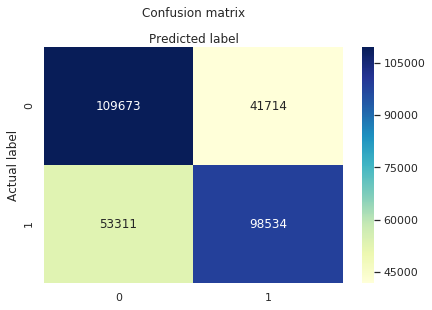

             precision    recall  f1-score   support

          0       0.67      0.72      0.70    151387
          1       0.70      0.65      0.67    151845

avg / total       0.69      0.69      0.69    303232

Accuracy: 0.6866260816800338


In [48]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

In [50]:
pipeline = Pipeline(steps=
                   [("dim_red", HashingVectorizer()),
                    ("model", LogisticRegression())])

_ = pipeline.fit(X_train, y_train)

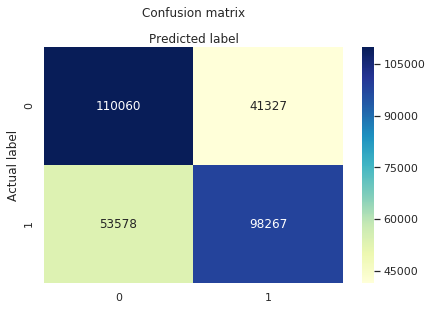

             precision    recall  f1-score   support

          0       0.67      0.73      0.70    151387
          1       0.70      0.65      0.67    151845

avg / total       0.69      0.69      0.69    303232

Accuracy: 0.6870218182777543


In [51]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

### Lemmatization

In [54]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [52]:
def sentence_tokenizer_lemmatization(text):
    return " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

In [55]:
df["lemma_comment"] = df["comment"].apply(lambda x: sentence_tokenizer_lemmatization(x))

In [56]:
X, y = df["lemma_comment"], df["label"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [60]:
pipeline = Pipeline(steps=
                   [("tfidf", HashingVectorizer()),
                   ("clf", LogisticRegression())])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=1048576, ngram_range=(1, 1), non_negative=False,
         norm='l2', p...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

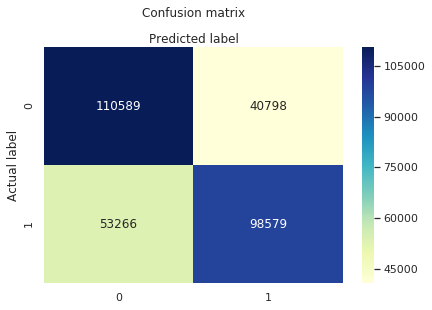

             precision    recall  f1-score   support

          0       0.67      0.73      0.70    151387
          1       0.71      0.65      0.68    151845

avg / total       0.69      0.69      0.69    303232

Accuracy: 0.6897952722667793


In [61]:
preds = pipeline.predict(X_test)
get_scores(y_test, preds)

### Deep Learning with Keras

In [63]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [64]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model


def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [65]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
____________________________________________

In [66]:
from keras.callbacks import EarlyStopping
model.fit(sequences_matrix,y_train,batch_size=128,epochs=3,
          validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Train on 636786 samples, validate on 70755 samples
Epoch 1/3
636786/636786 [==============================] - 394s 619us/step - loss: 0.5876 - accuracy: 0.6831 - val_loss: 0.5772 - val_accuracy: 0.6917
Epoch 2/3
636786/636786 [==============================] - 390s 612us/step - loss: 0.5723 - accuracy: 0.6965 - val_loss: 0.5720 - val_accuracy: 0.6957
Epoch 3/3
636786/636786 [==============================] - 409s 642us/step - loss: 0.5661 - accuracy: 0.7013 - val_loss: 0.5688 - val_accuracy: 0.7003
